<a href="https://colab.research.google.com/github/rochadelon/Desafio-Pratico-VExpenses/blob/main/Des_Pr%C3%A1tico_Ci%C3%AAncia_de_Dados_VExpenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import tabulate


df = pd.read_csv('/Dataset.csv')




#1. Análise Exploratória dos Dados

In [116]:
print(df.describe())

            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000


In [117]:
tabela_numericas = []
for coluna in df.select_dtypes(include=['number']).columns:
    frequencia = df[coluna].count()
    media = df[coluna].mean()
    moda = df[coluna].mode().iloc[0] if not df[coluna].mode().empty else None
    mediana = df[coluna].median()
    desvio_padrao = df[coluna].std()
    minimo = df[coluna].min()
    maximo = df[coluna].max()
    tabela_numericas.append({
        'Variável': coluna,
        'Frequência': frequencia,
        'Média': media,
        'Moda': moda,
        'Mediana': mediana,
        'Desvio Padrão': desvio_padrao,
        'Mínimo': minimo,
        'Máximo': maximo
    })

df_numericas = pd.DataFrame(tabela_numericas)

tabela_categoricas = []
for coluna in df.select_dtypes(include=['object', 'category']).columns:
    categorias = df[coluna].value_counts()
    for categoria, frequencia in categorias.items():
        proporcao = (frequencia / len(df)) * 100
        tabela_categoricas.append({
            'Variável': coluna,
            'Categoria': categoria,
            'Frequência': frequencia,
            'Proporção (%)': proporcao
        })

df_categoricas = pd.DataFrame(tabela_categoricas)

tabela_numericas_md = df_numericas.to_markdown(index=False, tablefmt="grid")
tabela_categoricas_md= df_categoricas.to_markdown(index=False, tablefmt="grid")

print(tabela_numericas_md)
print(tabela_categoricas_md)


+---------------------+--------------+------------+--------+------------+-----------------+----------+-------------+
| Variável            |   Frequência |      Média |   Moda |    Mediana |   Desvio Padrão |   Mínimo |      Máximo |
+=====================+==============+============+========+============+=================+==========+=============+
| Idade               |          190 |    38.5105 |     19 |    38      |       12.6799   |       18 |     59      |
+---------------------+--------------+------------+--------+------------+-----------------+----------+-------------+
| Renda Anual (em $)  |          189 | 58254      |  30000 | 50000      |    25612.1      |    30000 | 100000      |
+---------------------+--------------+------------+--------+------------+-----------------+----------+-------------+
| Tempo no Site (min) |          200 |    17.3491 |     -1 |    18.1976 |        7.72409  |       -1 |     29.8535 |
+---------------------+--------------+------------+--------+----

## 1.1 Distribuição das variáveis (idade, renda, tempo no site, etc.).



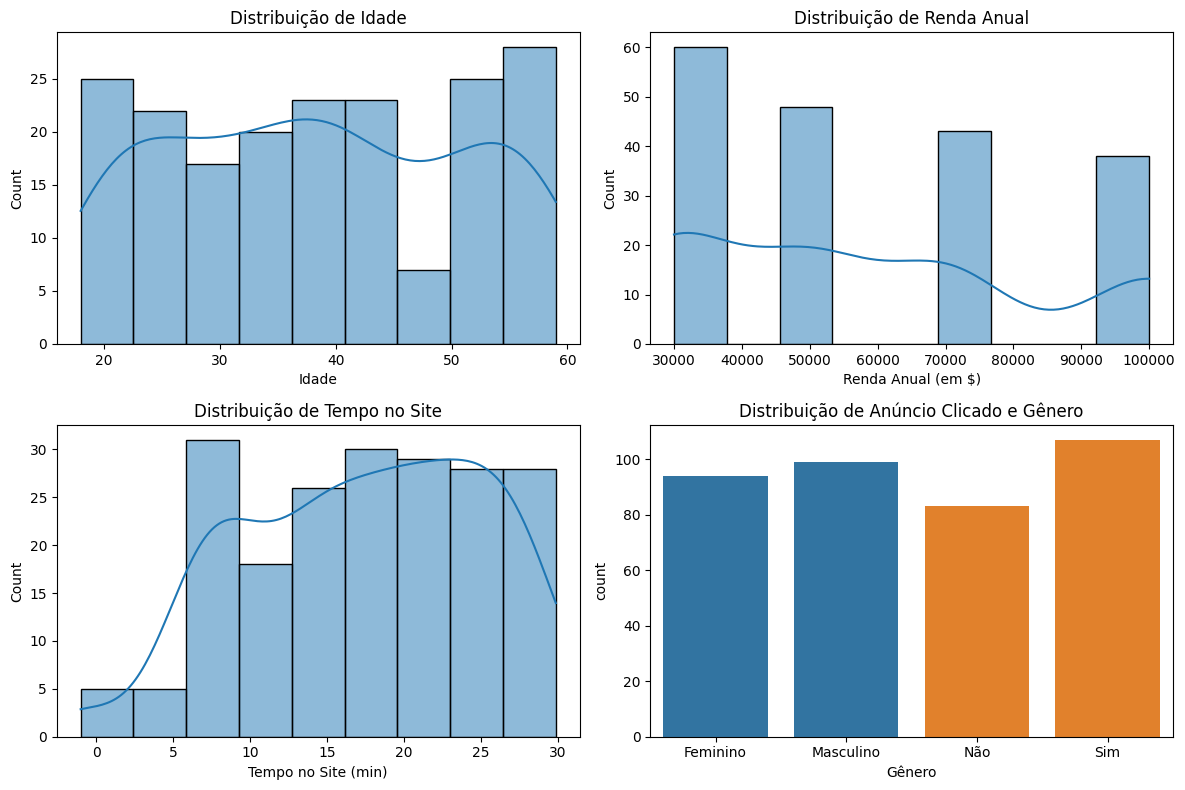

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['Idade'], kde=True, ax=axes[0, 0]).set_title("Distribuição de Idade")
sns.histplot(df['Renda Anual (em $)'], kde=True, ax=axes[0, 1]).set_title("Distribuição de Renda Anual")
sns.histplot(df['Tempo no Site (min)'], kde=True, ax=axes[1, 0]).set_title("Distribuição de Tempo no Site")

sns.countplot(x='Gênero', data=df, ax=axes[1, 1]).set_title("Distribuição de Gênero")
sns.countplot(x='Anúncio Clicado', data=df, ax=axes[1, 1]).set_title("Distribuição de Anúncio Clicado e Gênero")

plt.tight_layout()
plt.show()


## 1.2 Possíveis relações entre as variáveis independentes e a variável alvo (Compra).

In [119]:
variavel_alvo = 'Compra (0 ou 1)'
if variavel_alvo in df.columns:
    correlations_with_target = df.select_dtypes(include=np.number).corr()[[variavel_alvo]].dropna().sort_values(by=variavel_alvo, ascending=False)
    correlations_with_target.rename(columns={variavel_alvo: 'Correlação com a Variável Alvo'}, inplace=True)
else:
    correlations_with_target = pd.DataFrame()

correlation_table_md = tabulate.tabulate(
    correlations_with_target.reset_index(),
    headers=['Variável', 'Correlação com a Variável Alvo'],
    tablefmt='pipe',
    floatfmt=".2f"
)

print(correlation_table_md)


|    | Variável            |   Correlação com a Variável Alvo |
|---:|:--------------------|---------------------------------:|
|  0 | Compra (0 ou 1)     |                             1.00 |
|  1 | Tempo no Site (min) |                             0.15 |
|  2 | Idade               |                             0.11 |
|  3 | Renda Anual (em $)  |                            -0.04 |


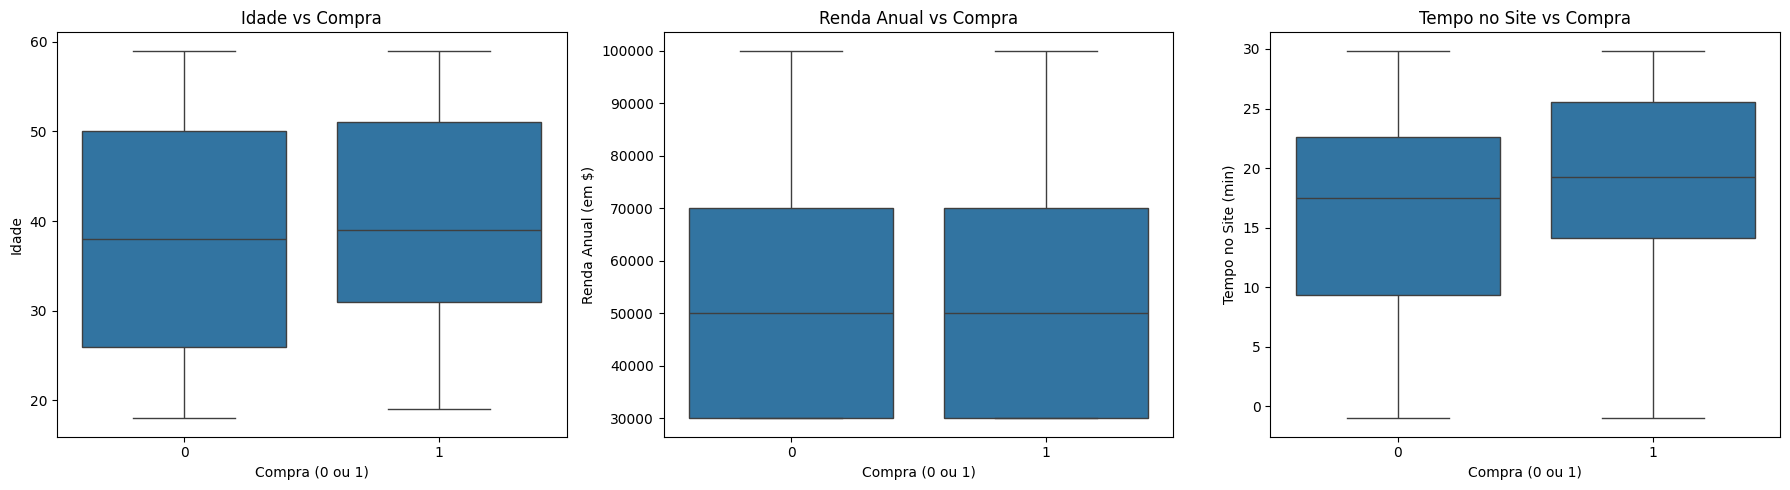

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.boxplot(x='Compra (0 ou 1)', y='Idade', data=df, ax=axes[0]).set_title("Idade vs Compra")

sns.boxplot(x='Compra (0 ou 1)', y='Renda Anual (em $)', data=df, ax=axes[1]).set_title("Renda Anual vs Compra")

sns.boxplot(x='Compra (0 ou 1)', y='Tempo no Site (min)', data=df, ax=axes[2]).set_title("Tempo no Site vs Compra")


plt.tight_layout()
plt.show()

## 1.3 Identifique valores ausentes ou inconsistências nos dados.

---



In [121]:
total_registros = len(df)
valores_ausentes = df.isnull().sum()
registros_validos = total_registros - valores_ausentes
proporcao_ausentes = (valores_ausentes / total_registros) * 100

tabela_resumo = pd.DataFrame({
    "Variável": df.columns,
    "Total de Registros": total_registros,
    "Registros Válidos": registros_validos,
    "Valores Ausentes": valores_ausentes,
    "Proporção de Ausentes (%)": proporcao_ausentes.round(2)
})

tabela_markdown = tabela_resumo.to_markdown(index=False)

print(tabela_markdown)


| Variável            |   Total de Registros |   Registros Válidos |   Valores Ausentes |   Proporção de Ausentes (%) |
|:--------------------|---------------------:|--------------------:|-------------------:|----------------------------:|
| Idade               |                  200 |                 190 |                 10 |                         5   |
| Renda Anual (em $)  |                  200 |                 189 |                 11 |                         5.5 |
| Gênero              |                  200 |                 193 |                  7 |                         3.5 |
| Tempo no Site (min) |                  200 |                 200 |                  0 |                         0   |
| Anúncio Clicado     |                  200 |                 190 |                 10 |                         5   |
| Compra (0 ou 1)     |                  200 |                 200 |                  0 |                         0   |


In [122]:
variaveis_numericas = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']
variavel_binaria = 'Compra (0 ou 1)'
variaveis_categoricas = ['Gênero', 'Anúncio Clicado']

variaveis_esperadas = {
    'Gênero': ['Masculino', 'Feminino'],
    'Anúncio Clicado': ['Sim', 'Não']
}


def is_not_numeric(value):
    return not isinstance(value, (int, float))


inconsistencias_numericas = {}
for col in variaveis_numericas:
    if col in df.columns:
        inconsistencias = df[df[col].map(is_not_numeric)][col].dropna().unique()
        inconsistencias_numericas[col] = inconsistencias

print("Inconsistências nas variáveis numéricas:\n", inconsistencias_numericas)

if variavel_binaria in df.columns:
    inconsistencias_binarias = df[~df[variavel_binaria].isin([0, 1])][variavel_binaria].dropna().unique()
else:
    inconsistencias_binarias = []

inconsistencias_categoricas = {
    col: df[~df[col].isin(expected)][col].dropna().unique()
    for col, expected in variaveis_esperadas.items() if col in df.columns
}

print("Inconsistências nas variáveis numéricas:\n", inconsistencias_numericas, "\n")
print("Inconsistências na variável binária:\n", inconsistencias_binarias, "\n")
print("Inconsistências nas variáveis categóricas:\n", inconsistencias_categoricas, "\n")


Inconsistências nas variáveis numéricas:
 {'Idade': array([], dtype=float64), 'Renda Anual (em $)': array([], dtype=float64), 'Tempo no Site (min)': array([], dtype=float64)}
Inconsistências nas variáveis numéricas:
 {'Idade': array([], dtype=float64), 'Renda Anual (em $)': array([], dtype=float64), 'Tempo no Site (min)': array([], dtype=float64)} 

Inconsistências na variável binária:
 [] 

Inconsistências nas variáveis categóricas:
 {'Gênero': array([], dtype=object), 'Anúncio Clicado': array([], dtype=object)} 



# 2. Pré-Procesamento de Dados

## 2.1 Tratamento de Valores Ausentes e Normalização.

In [123]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna antes do Pré-Processamento :\n", missing_values, "\n")

Valores ausentes por coluna antes do Pré-Processamento :
 Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64 



In [124]:

data_preprocessed = df.copy()

for col in variaveis_numericas:
    if col in data_preprocessed.columns:
        data_preprocessed[col].fillna(data_preprocessed[col].median(), inplace=True)

for col in variaveis_categoricas:
    if col in data_preprocessed.columns:
        data_preprocessed[col].fillna(data_preprocessed[col].mode()[0], inplace=True)

scaler = MinMaxScaler()
if all(var in data_preprocessed.columns for var in variaveis_numericas):
    data_preprocessed[variaveis_numericas] = scaler.fit_transform(data_preprocessed[variaveis_numericas])

print("Dataframe após Tratamento e Normalização: \n", data_preprocessed.head(), "\n")

missing_values = data_preprocessed.isnull().sum()

missing_values

Dataframe após Tratamento e Normalização: 
       Idade  Renda Anual (em $)    Gênero  Tempo no Site (min)  \
0  0.268293            0.000000  Feminino             0.218507   
1  0.975610            0.285714  Feminino             0.741748   
2  0.780488            0.571429  Feminino             0.230812   
3  0.073171            1.000000  Feminino             0.559578   
4  1.000000            0.285714  Feminino             0.947565   

  Anúncio Clicado  Compra (0 ou 1)  
0             Não                0  
1             Sim                0  
2             Não                1  
3             Não                0  
4             Sim                1   



<ipython-input-124-151980640841>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_preprocessed[col].fillna(data_preprocessed[col].median(), inplace=True)
<ipython-input-124-151980640841>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,0
Idade,0
Renda Anual (em $),0
Gênero,0
Tempo no Site (min),0
Anúncio Clicado,0
Compra (0 ou 1),0


In [125]:
print("Valores ausentes após o preenchimento:\n", missing_values, "\n")
print("\nEstatísticas descritivas após o pré-processamento:\n")
print(df.describe())

Valores ausentes após o preenchimento:
 Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64 


Estatísticas descritivas após o pré-processamento:

            Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)
count  190.000000          189.000000           200.000000       200.000000
mean    38.510526        58253.968254            17.349090         0.330000
std     12.679918        25612.061811             7.724088         0.471393
min     18.000000        30000.000000            -1.000000         0.000000
25%     28.000000        30000.000000            10.860240         0.000000
50%     38.000000        50000.000000            18.197552         0.000000
75%     50.000000        70000.000000            23.887341         1.000000
max     59.000000       100000.000000            29.853484         1.000000


In [126]:
total_registros = len(data_preprocessed)
valores_ausentes = data_preprocessed.isnull().sum()
registros_validos = total_registros - valores_ausentes
proporcao_ausentes = (valores_ausentes / total_registros) * 100

tabela_resumo = pd.DataFrame({
    "Variável": data_preprocessed.columns,
    "Total de Registros": total_registros,
    "Registros Válidos": registros_validos,
    "Valores Ausentes": valores_ausentes,
    "Proporção de Ausentes (%)": proporcao_ausentes.round(2)
})

tabela_markdown = tabela_resumo.to_markdown(index=False)

print(tabela_markdown)

| Variável            |   Total de Registros |   Registros Válidos |   Valores Ausentes |   Proporção de Ausentes (%) |
|:--------------------|---------------------:|--------------------:|-------------------:|----------------------------:|
| Idade               |                  200 |                 200 |                  0 |                           0 |
| Renda Anual (em $)  |                  200 |                 200 |                  0 |                           0 |
| Gênero              |                  200 |                 200 |                  0 |                           0 |
| Tempo no Site (min) |                  200 |                 200 |                  0 |                           0 |
| Anúncio Clicado     |                  200 |                 200 |                  0 |                           0 |
| Compra (0 ou 1)     |                  200 |                 200 |                  0 |                           0 |


## 2.2 Realizar codificação para variáveis categóricas, transformando-as em valores.


In [127]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoded_categoricals = encoder.fit_transform(df[variaveis_categoricas])
encoded_categoricals_df = pd.DataFrame(encoded_categoricals, columns=encoder.get_feature_names_out(variaveis_categoricas))
data_preprocessed = pd.concat([data_preprocessed.reset_index(drop=True), encoded_categoricals_df], axis=1)


for col in variaveis_categoricas:
    if col in data_preprocessed.columns:
        data_preprocessed.drop(columns=[col], inplace=True)

print("### DataFrame após codificação:")
print(data_preprocessed.head().to_markdown(index=False))

### DataFrame após codificação:
|     Idade |   Renda Anual (em $) |   Tempo no Site (min) |   Compra (0 ou 1) |   Gênero_Masculino |   Gênero_nan |   Anúncio Clicado_Sim |   Anúncio Clicado_nan |
|----------:|---------------------:|----------------------:|------------------:|-------------------:|-------------:|----------------------:|----------------------:|
| 0.268293  |             0        |              0.218507 |                 0 |                  0 |            0 |                     0 |                     0 |
| 0.97561   |             0.285714 |              0.741748 |                 0 |                  0 |            0 |                     1 |                     0 |
| 0.780488  |             0.571429 |              0.230812 |                 1 |                  0 |            0 |                     0 |                     0 |
| 0.0731707 |             1        |              0.559578 |                 0 |                  0 |            0 |                     0 |   

## 2.3 Divisão dos dados em conjuntos de treino e teste.

In [128]:
X = data_preprocessed.drop(columns=['Compra (0 ou 1)'])
y = data_preprocessed['Compra (0 ou 1)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, data_preprocessed.head()

((140, 7),
 (60, 7),
 (140,),
 (60,),
       Idade  Renda Anual (em $)  Tempo no Site (min)  Compra (0 ou 1)  \
 0  0.268293            0.000000             0.218507                0   
 1  0.975610            0.285714             0.741748                0   
 2  0.780488            0.571429             0.230812                1   
 3  0.073171            1.000000             0.559578                0   
 4  1.000000            0.285714             0.947565                1   
 
    Gênero_Masculino  Gênero_nan  Anúncio Clicado_Sim  Anúncio Clicado_nan  
 0               0.0         0.0                  0.0                  0.0  
 1               0.0         0.0                  1.0                  0.0  
 2               0.0         0.0                  0.0                  0.0  
 3               0.0         0.0                  0.0                  0.0  
 4               0.0         0.0                  1.0                  0.0  )

# 3 Modelo de Classificação

## 3.1 Treinamento do modelo de Árvore de Decisão

In [129]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)




DecisionTreeClassifier(random_state=42)

## 3.2 Avaliar o modelo utilizando métricas apropriadas

Acurácia: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        35
           1       0.50      0.20      0.29        25

    accuracy                           0.58        60
   macro avg       0.55      0.53      0.50        60
weighted avg       0.56      0.58      0.53        60



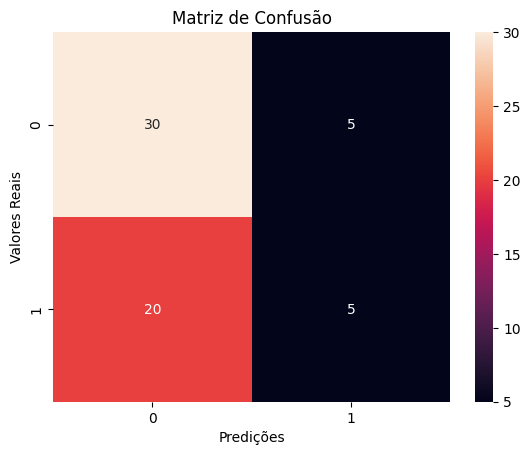

In [130]:
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

# Interpretação dos resultados

# Importância das Variáveis

| Variável            |   Importância |
|:--------------------|--------------:|
| Tempo no Site (min) |     0.449406  |
| Idade               |     0.318949  |
| Renda Anual (em $)  |     0.165295  |
| Anúncio Clicado_nan |     0.0302123 |
| Gênero_Masculino    |     0.0238477 |
| Anúncio Clicado_Sim |     0.0122908 |
| Gênero_nan          |     0         |


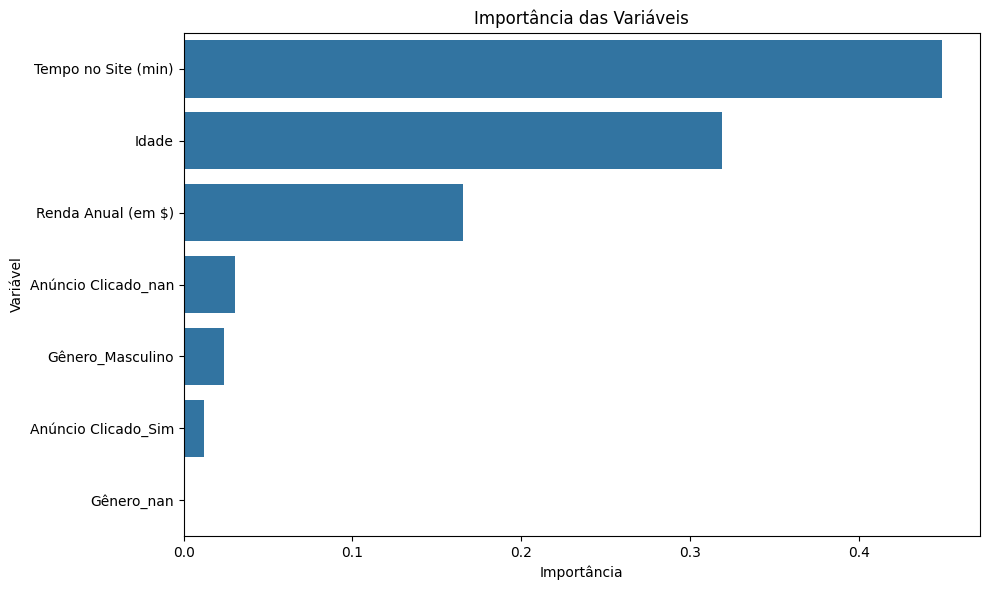

In [134]:
feature_importances = decision_tree_model.feature_importances_

feature_importance_df = pd.DataFrame({'Variável': X_train.columns, 'Importância': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importância', ascending=False)

markdown_table = feature_importance_df.to_markdown(index=False)
print("# Importância das Variáveis\n")
print(markdown_table)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=feature_importance_df)
plt.title('Importância das Variáveis')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()
